In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Parkinson/

/content/drive/MyDrive/Parkinson


In [3]:
pwd

'/content/drive/MyDrive/Parkinson'

In [7]:
import pandas as pd

# 1. Load the datset
df = pd.read_csv("Parkinsson disease_classification.csv")

In [8]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [17]:
# 2. Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and labels
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 3. Train a classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# Accuracy Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [ ]:
# Save model + scaler together
import pickle

# save the trained model
with open("parkinson_classification_pipeline.pkl", "wb") as f:
  pickle.dump((scaler, model), f)

print("model saved")

model saved


<Figure size 640x480 with 0 Axes>

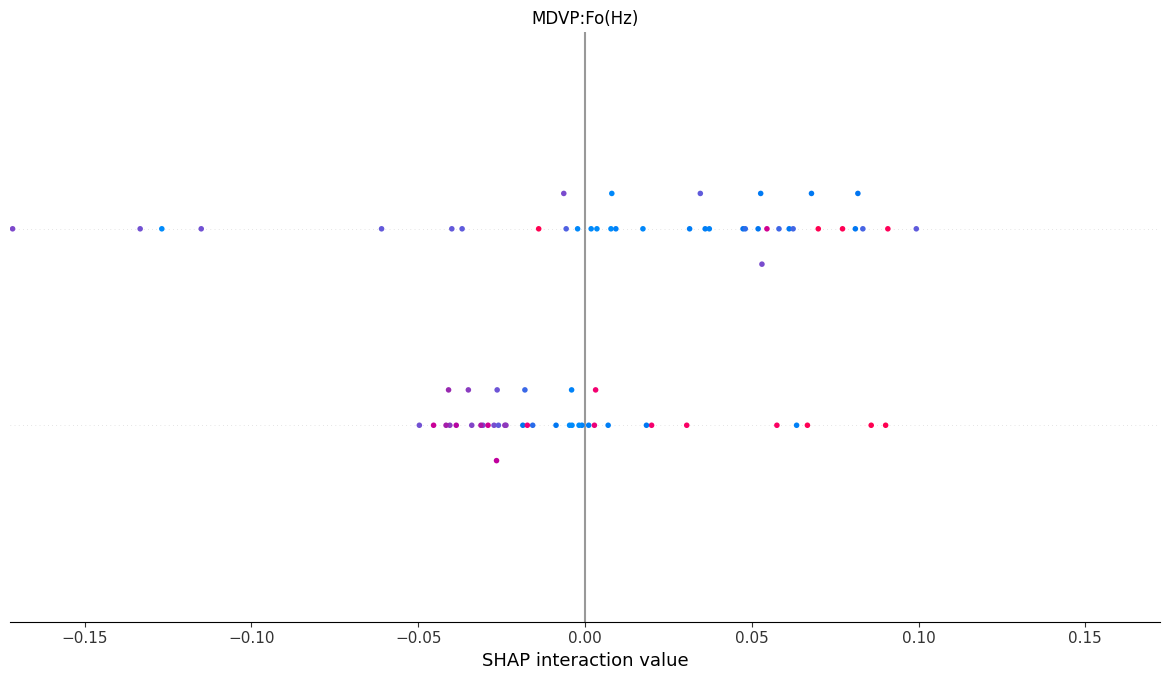

In [ ]:
# 4. Explainability
import shap # use SHAP to visualize which features are influencing the predictions

explainer = shap.TreeExplainer(model, X_train)

shap_values = explainer(X_test)

# summary plot
shap.summary_plot(shap_values.values, X_test, feature_names=X.columns)

In [ ]:
print(len(shap_values))  # (class 0, class 1)
print(shap_values[0].shape)
print(shap_values[1].shape)
print(X_test.shape)


39
(22, 2)
(22, 2)
(39, 22)


## Feature Description - Parkinson’s Disease Dataset

### Frequency Features
- **MDVP:Fo(Hz)**: Mean fundamental frequency (average pitch)
- **MDVP:Fhi(Hz)**: Maximum pitch in the voice signal
- **MDVP:Flo(Hz)**: Minimum pitch in the voice signal

### Jitter (Frequency Variation)
- **MDVP:Jitter(%)**: Relative pitch variation
- **MDVP:Jitter(Abs)**: Absolute pitch variation
- **MDVP:RAP**, **MDVP:PPQ**, **Jitter:DDP**: Detailed jitter metrics for short-term pitch instability

### Shimmer (Amplitude Variation)
- **MDVP:Shimmer**: Relative amplitude variation
- **MDVP:Shimmer(dB)**: Shimmer measured in decibels
- **Shimmer:APQ3**, **Shimmer:APQ5**, **MDVP:APQ**, **Shimmer:DDA**: Additional shimmer metrics capturing amplitude instability

### Voice Quality (Noise Measures)
- **NHR**: Noise-to-Harmonics Ratio (higher = noisier)
- **HNR**: Harmonics-to-Noise Ratio (higher = cleaner)

### Nonlinear Dynamic Measures
- **RPDE**: Complexity and periodicity in voice (Recurrence Period Density Entropy)
- **DFA**: Long-term signal correlation (Detrended Fluctuation Analysis)

### Signal Complexity & Spread
- **spread1**, **spread2**: Variability in the signal over time
- **D2**: Correlation dimension — complexity of the signal
- **PPE**: Pitch Period Entropy — randomness in pitch timing

### Target Variable
- **status**: Diagnosis label  
  - `1` = Parkinson's Disease  
  - `0` = Healthy

In [12]:
# === 1. Import libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix
)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# === 2. Load dataset ===
df = pd.read_csv("Parkinsson disease_classification.csv")

# === 3. Prepare features and target ===
X = df.drop(columns=["name", "status"])
y = df["status"]

# === 4. Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === 5. Feature scaling ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === 6. Define multiple classification models ===
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# === 7. Train and evaluate each model ===
results = []
conf_matrices = {}

for name, model in tqdm(models.items(), desc="Training models"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    conf_matrices[name] = confusion_matrix(y_test, y_pred)

Training models: 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]


In [13]:
# === 8. Display summary metrics ===
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1 Score
1                  KNN  0.948718   0.941176     1.0  0.969697
4    Gradient Boosting  0.948718   0.941176     1.0  0.969697
3        Random Forest  0.948718   0.941176     1.0  0.969697
0  Logistic Regression  0.897436   0.888889     1.0  0.941176
2                  SVM  0.897436   0.888889     1.0  0.941176


<ipython-input-14-c11932e7e738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
<ipython-input-14-c11932e7e738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
<ipython-input-14-c11932e7e738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
<ipython-input-14-c11932e7e738>:7: FutureWarning: 

Passing `palette` without assigning `hue` is 

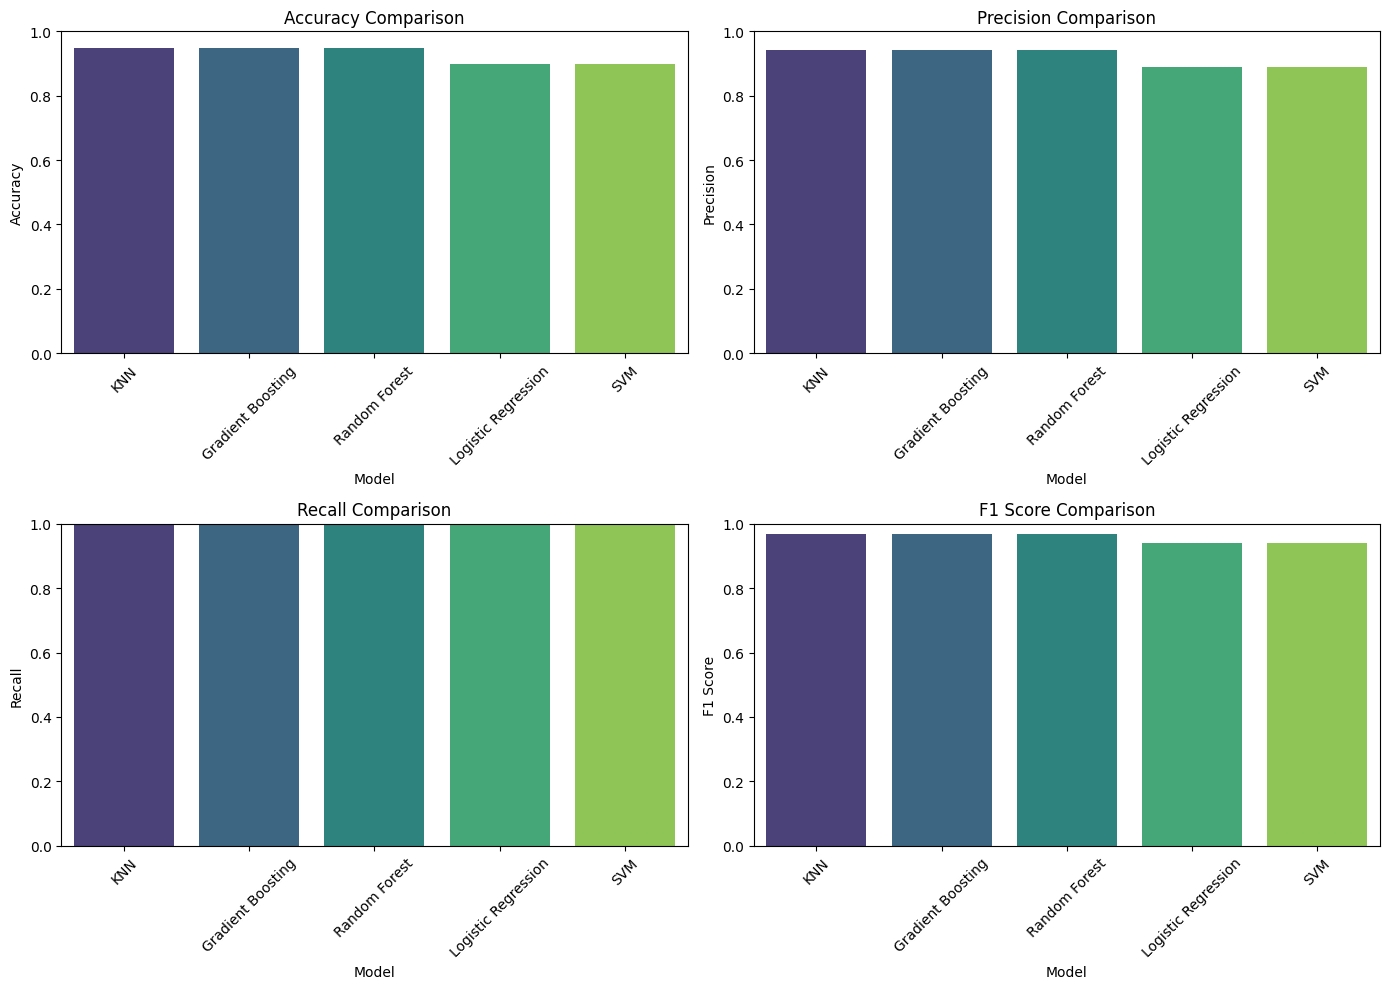

In [14]:
# === 9. Plot metrics (bar chart) ===
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{metric} Comparison")
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

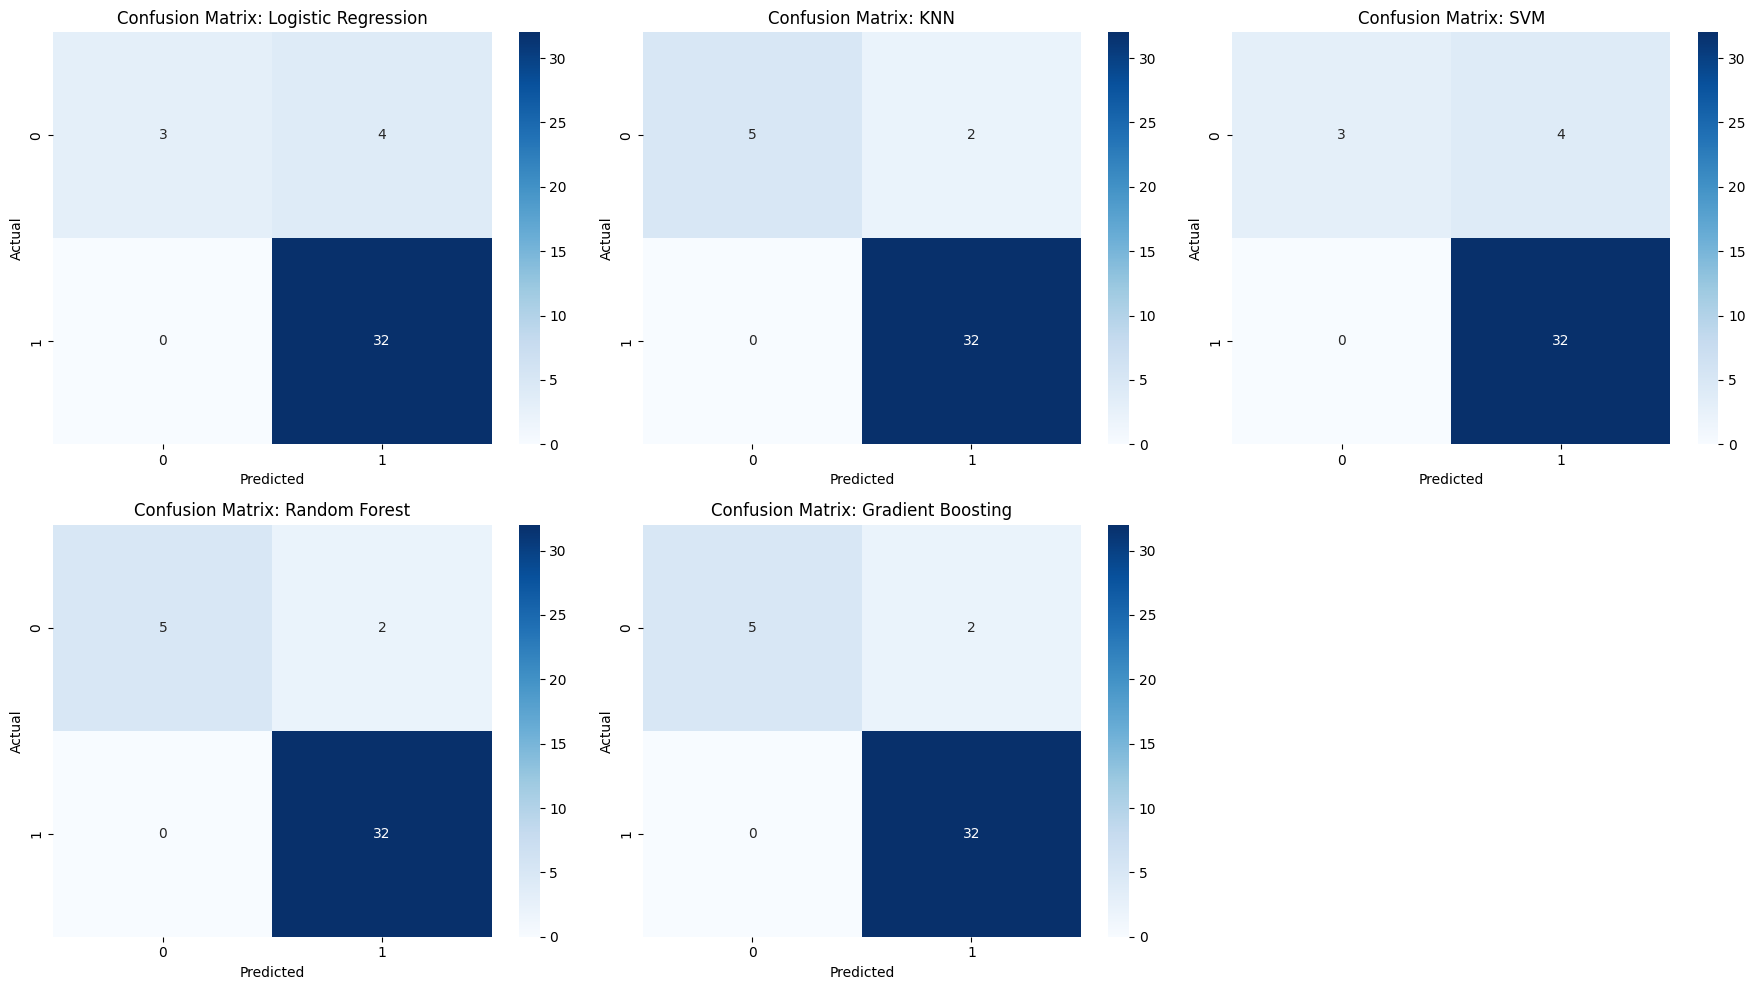

In [15]:
# === 10. Plot confusion matrices ===
fig_cm, axes_cm = plt.subplots(2, 3, figsize=(18, 10))
axes_cm = axes_cm.flatten()

for i, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes_cm[i])
    axes_cm[i].set_title(f"Confusion Matrix: {name}")
    axes_cm[i].set_xlabel("Predicted")
    axes_cm[i].set_ylabel("Actual")

# Remove extra subplots if less than 6
for i in range(len(models), len(axes_cm)):
    fig_cm.delaxes(axes_cm[i])

plt.tight_layout()
plt.show()


In [19]:
# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scorers = {
    "Accuracy": make_scorer(accuracy_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),
    "F1 Score": make_scorer(f1_score)
}

cv_results = []
for name, model in tqdm(models.items(), desc="Cross-validating models"):
    result = {"Model": name}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring=scorer)
        result[f"{metric_name} Mean"] = scores.mean()
        result[f"{metric_name} Std"] = scores.std()
    cv_results.append(result)

Cross-validating models: 100%|██████████| 5/5 [00:12<00:00,  2.50s/it]


In [20]:
cv_results_df = pd.DataFrame(cv_results).sort_values(by="F1 Score Mean", ascending=False)
print(cv_results_df)

                 Model  Accuracy Mean  Accuracy Std  Precision Mean  \
4    Gradient Boosting       0.917949      0.044114        0.929706   
3        Random Forest       0.887179      0.061964        0.908595   
1                  KNN       0.887179      0.041662        0.914514   
2                  SVM       0.871795      0.053785        0.861001   
0  Logistic Regression       0.866667      0.049720        0.893117   

   Precision Std  Recall Mean  Recall Std  F1 Score Mean  F1 Score Std  
4       0.044843     0.965977    0.030338       0.946752      0.028386  
3       0.069675     0.952184    0.041159       0.927710      0.038119  
1       0.031195     0.938851    0.050257       0.925586      0.029306  
2       0.049361     0.993103    0.013793       0.921675      0.031486  
0       0.048401     0.938621    0.054670       0.913491      0.032346  


<ipython-input-23-58b362f21248>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", ci=None)


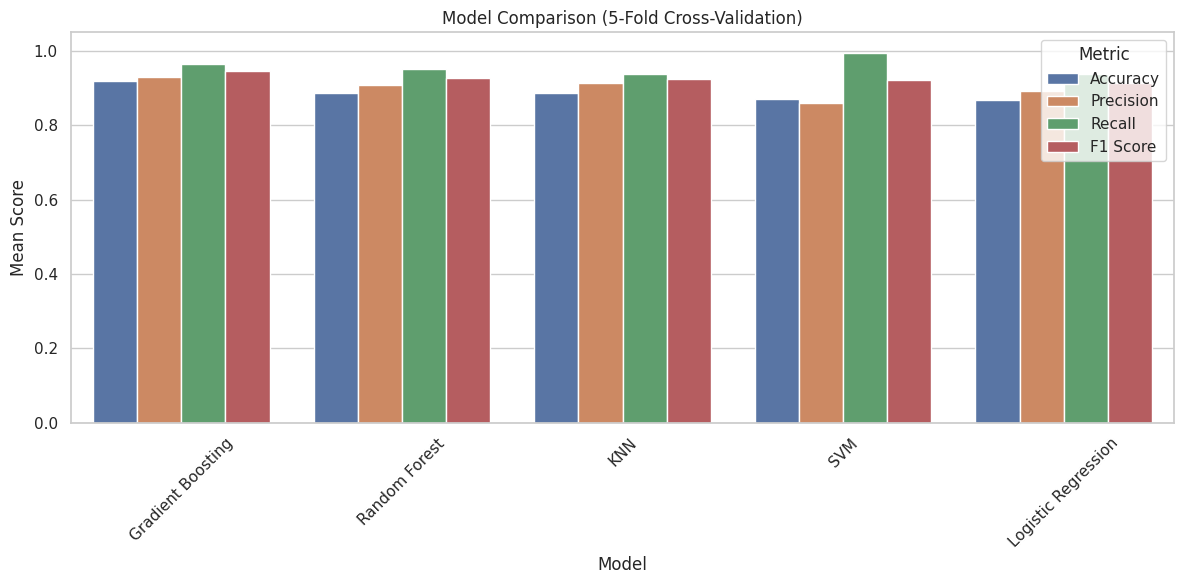

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# for visualization convert to long-form dataframe
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
plot_data = []

for _, row in cv_results_df.iterrows():
    for metric in metrics:
        plot_data.append({
            "Model": row["Model"],
            "Metric": metric,
            "Score": row[f"{metric} Mean"],
            "Std": row[f"{metric} Std"]
        })

plot_df = pd.DataFrame(plot_data)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", ci=None)
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.ylim(0, 1.05)
plt.ylabel("Mean Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
